In [4]:
import warnings
import pdb
import os
import re
import sys
import imp
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import functools
from functools import reduce
from collections import Counter
import pyarrow as pa
import pyarrow.parquet as pq

import scipy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# to work with anndata
import anndata
import scanpy as sc


In [5]:
sys.path.append(os.path.dirname(os.getcwd()))
from baselines.baselines_helpers import scale, convert_to_ann
from visualisation_and_evaluation.helpers_vizualisation import plot_scores

In [12]:
wd = os.getcwd()
wd = os.path.abspath(os.path.join(wd,"..","..","data"))

In [ ]:
#################   simulated data   ###############

In [ ]:
######  all cell populations shared  ######

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
... storing 'sample' as categorical
... storing 'batch' as categorical
... storing 'cell_type' as categorical


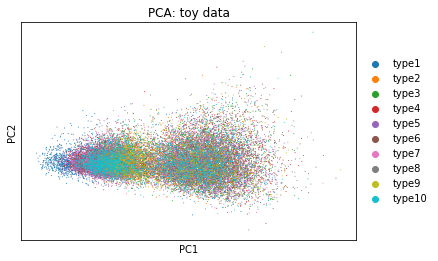

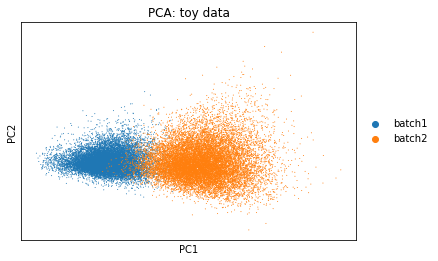

In [31]:
data_path = wd+'/simulated/'
df_sim = pd.read_parquet(data_path+'toy_data_gamma_w_index.parquet')
adata_sim = convert_to_ann(df_sim)

# dim reduction
sc.tl.pca(adata_sim)
# plots
sc.pl.pca(adata_sim, color='cell_type', title='PCA: toy data', return_fig=True)
plt.savefig(data_path+'/plots/pca_sim_celltypes.png', dpi=300, bbox_inches='tight')
sc.pl.pca(adata_sim, color='batch', title='PCA: toy data', return_fig=True)
plt.savefig(data_path+'/plots/pca_sim_batches.png', dpi=300, bbox_inches='tight')


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
... storing 'sample' as categorical
... storing 'batch' as categorical
... storing 'cell_type' as categorical


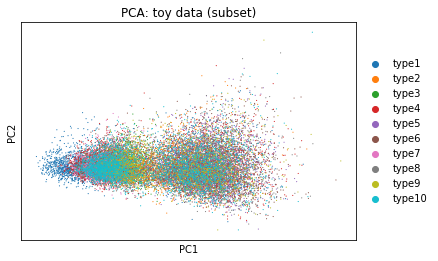

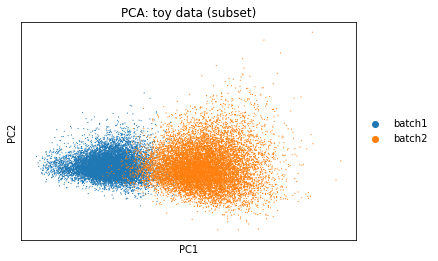

In [32]:
######  some cell populations shared  ######
data_path = wd+'/simulated/'
df_sim = pd.read_parquet(data_path+'toy_data_gamma_w_index_subset.parquet')
adata_sim = convert_to_ann(df_sim)

# dim reduction
sc.tl.pca(adata_sim)
# plots
sc.pl.pca(adata_sim, color='cell_type', title='PCA: toy data (subset)', return_fig=True)
plt.savefig(data_path+'/plots/pca_sim_subset_celltypes.png', dpi=300, bbox_inches='tight')
sc.pl.pca(adata_sim, color='batch', title='PCA: toy data (subset)', return_fig=True)
plt.savefig(data_path+'/plots/pca_sim_subset_batches.png', dpi=300, bbox_inches='tight')


In [ ]:
####################  Chevrier data  ###################

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
... storing 'sample' as categorical
... storing 'batch' as categorical
... storing 'cell_type' as categorical


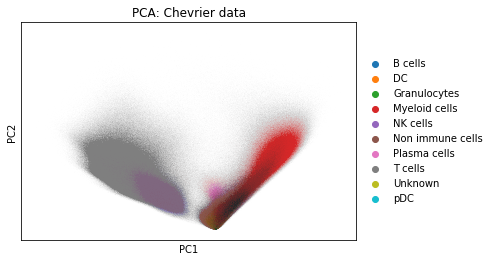

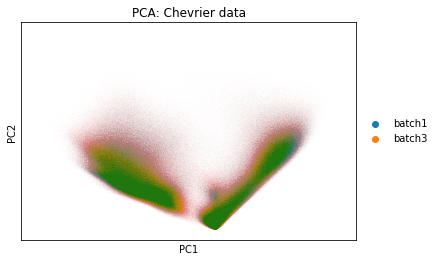

In [33]:
data_path = wd+'/Dataset5/'
df_full = pd.read_parquet(data_path+'chevrier_data_pooled_full_panels.parquet')
df_full = df_full.dropna(axis=1)
adata_full = convert_to_ann(df_full)

# dim reduction
sc.tl.pca(adata_full)
# plots
sc.pl.pca(adata_full, color='cell_type', title='PCA: Chevrier data', return_fig=True)
plt.savefig(data_path+'/plots/pca_full_celltypes.png', dpi=300, bbox_inches='tight')
sc.pl.pca(adata_full, color='batch', title='PCA: Chevrier data', return_fig=True)
plt.savefig(data_path+'/plots/pca_full_batches.png', dpi=300, bbox_inches='tight')


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


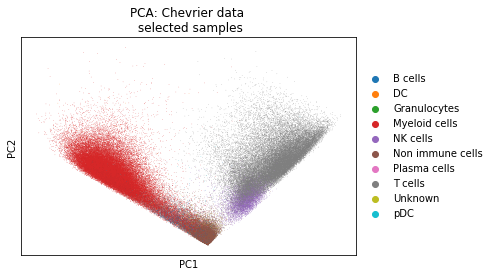

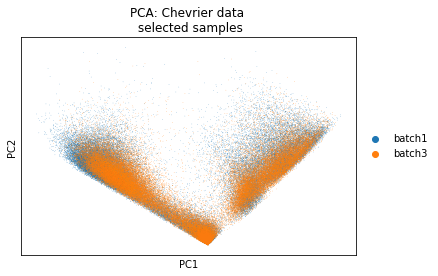

In [34]:
### only selected samples
samples_selected = ['sample5','sample75','sample65']
adata_selected = adata_full[adata_full.obs['sample'].isin(samples_selected),:].copy()
# dim reduction
sc.tl.pca(adata_selected)
# plots
sc.pl.pca(adata_selected, color='cell_type', title='PCA: Chevrier data \n selected samples', return_fig=True)
plt.savefig(data_path+'/plots/pca_full_selected_celltypes.png', dpi=300, bbox_inches='tight')
sc.pl.pca(adata_selected, color='batch', title='PCA: Chevrier data \n selected samples', return_fig=True)
plt.savefig(data_path+'/plots/pca_full_selected_batches.png', dpi=300, bbox_inches='tight')
